In [1]:
# Importing the required libraries 
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
db_host = '18.136.56.185:3306'
username = 'dm_team3'
user_pass = 'dm_team15119#'
db_name = 'project_telecom'

In [3]:
# Connection String
conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)
conn.table_names()


['telecom_churn_data']

In [4]:
query = 'select * from telecom_churn_data' 
telecom_churn_data = pd.read_sql(query,conn) 
print(telecom_churn_data.shape)

(4617, 21)


In [6]:
telecom_churn_data

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [7]:
telecom_churn_data.to_csv('telecom_churn_data.csv')


In [8]:
telecom_churn_data=pd.read_csv('telecom_churn.csv')
telecom_churn_data

,Unnamed: 0,State,Acc-Length,Area Code,Phone,International_Plan,Vmail_Plan,Vmail Msg,Day Mins,Day Calls,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,Customer Calls,Churn
0,NaN,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,NaN,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NaN,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,NaN,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,NaN,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NaN,NY,57,510,345-7512,no,yes,25,144.0,81,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NaN,NM,177,408,343-6820,no,yes,29,189.0,91,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,NaN,VT,67,408,338-4794,no,yes,33,127.5,126,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,NaN,MI,98,415,355-8388,no,yes,23,168.9,98,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [9]:
data=pd.DataFrame(telecom_churn_data)
data.drop(data.columns[0],axis=1,inplace=True)
data

,State,Acc-Length,Area Code,Phone,International_Plan,Vmail_Plan,Vmail Msg,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,Customer Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [10]:
data.head(5)



,State,Acc-Length,Area Code,Phone,International_Plan,Vmail_Plan,Vmail Msg,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,Customer Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [11]:
data.describe()

,Acc-Length,Area Code,Vmail Msg,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,Customer Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
 data=data.drop('Phone',axis=1)


In [13]:
cname = data.columns[(data.dtypes=="float64")|(data.dtypes=="int64")].tolist()
print(cname)
cat_names = data.select_dtypes(exclude=np.number).columns.tolist()
cat_names.remove('Churn')
cat_names

['Acc-Length', 'Area Code', 'Vmail Msg', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'International Mins', 'International Calls', 'International Charge', 'Customer Calls']


['State', 'International_Plan', 'Vmail_Plan']

In [15]:
#Checking Missing Value in Data
data.isnull().sum()


State                   0
Acc-Length              0
Area Code               0
International_Plan      0
Vmail_Plan              0
Vmail Msg               0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International Calls     0
International Charge    0
Customer Calls          0
Churn                   0
dtype: int64

In [14]:
data.shape

(4617, 20)

In [17]:
data.describe()


,Acc-Length,Area Code,Vmail Msg,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,Customer Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Visualizing data

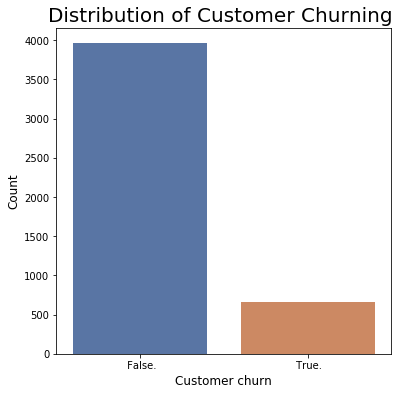

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x = data.Churn,palette='deep')
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churning ",fontsize= 20)
plt.show()


In [19]:
def diff_bar(x,y):
    
    data.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

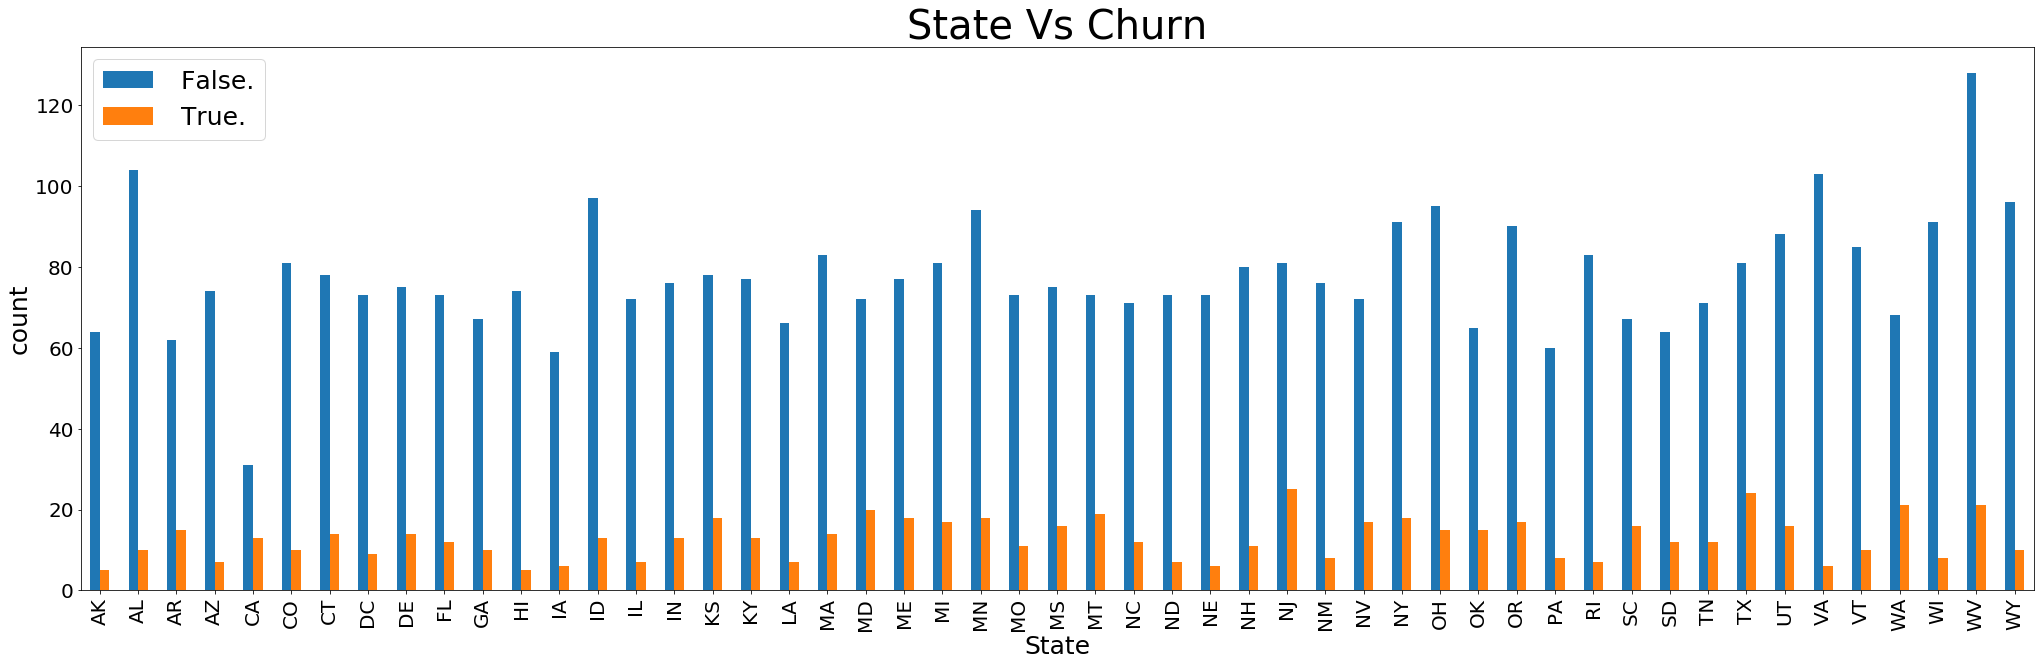

In [20]:
diff_bar('State','Churn')

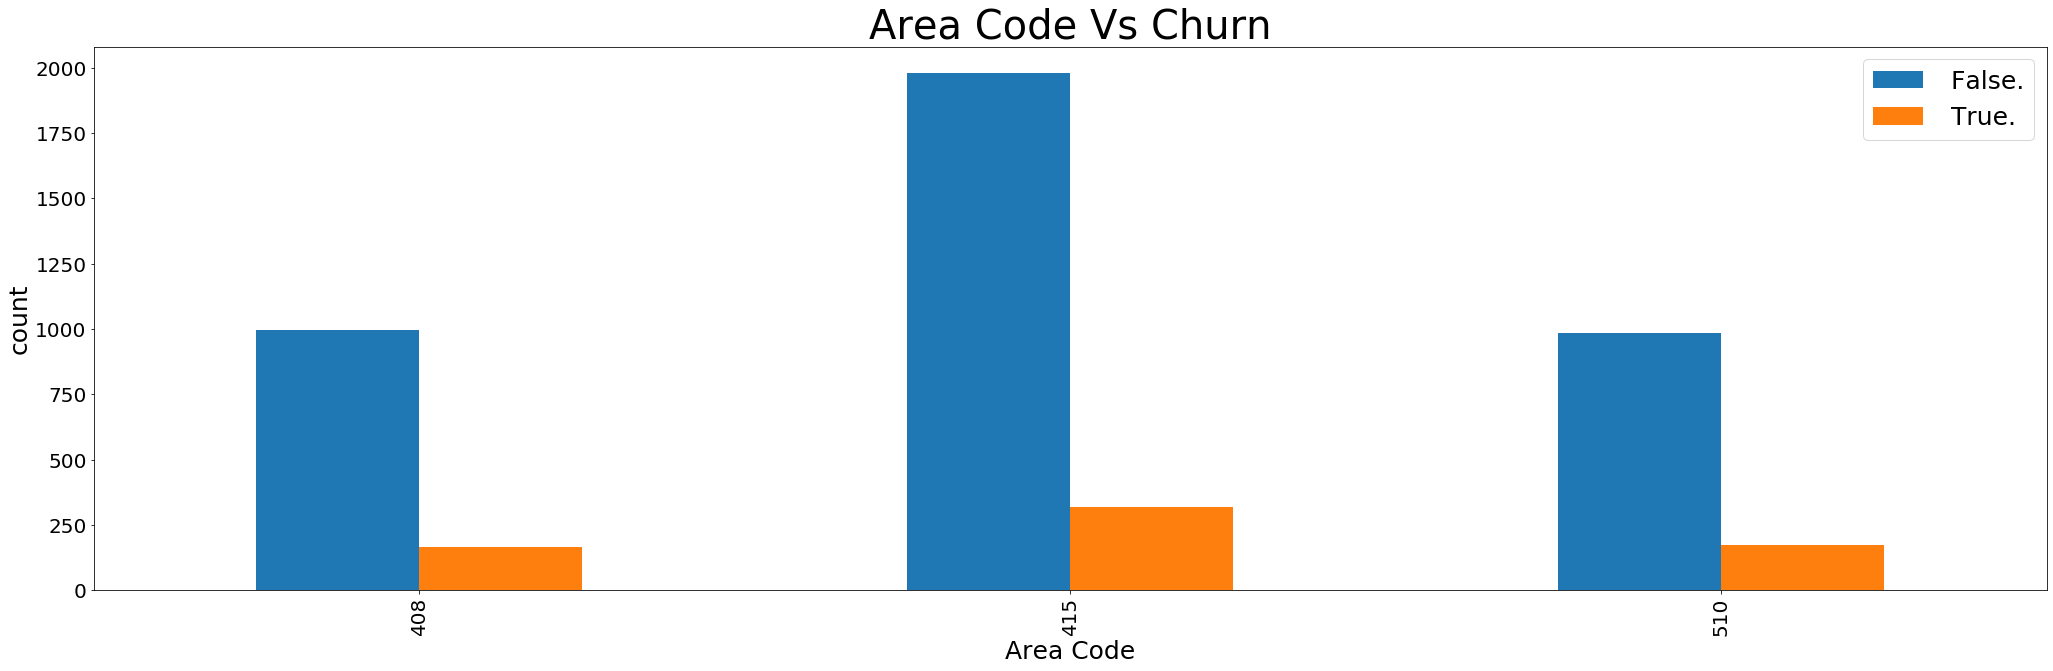

In [21]:
diff_bar('Area Code','Churn')


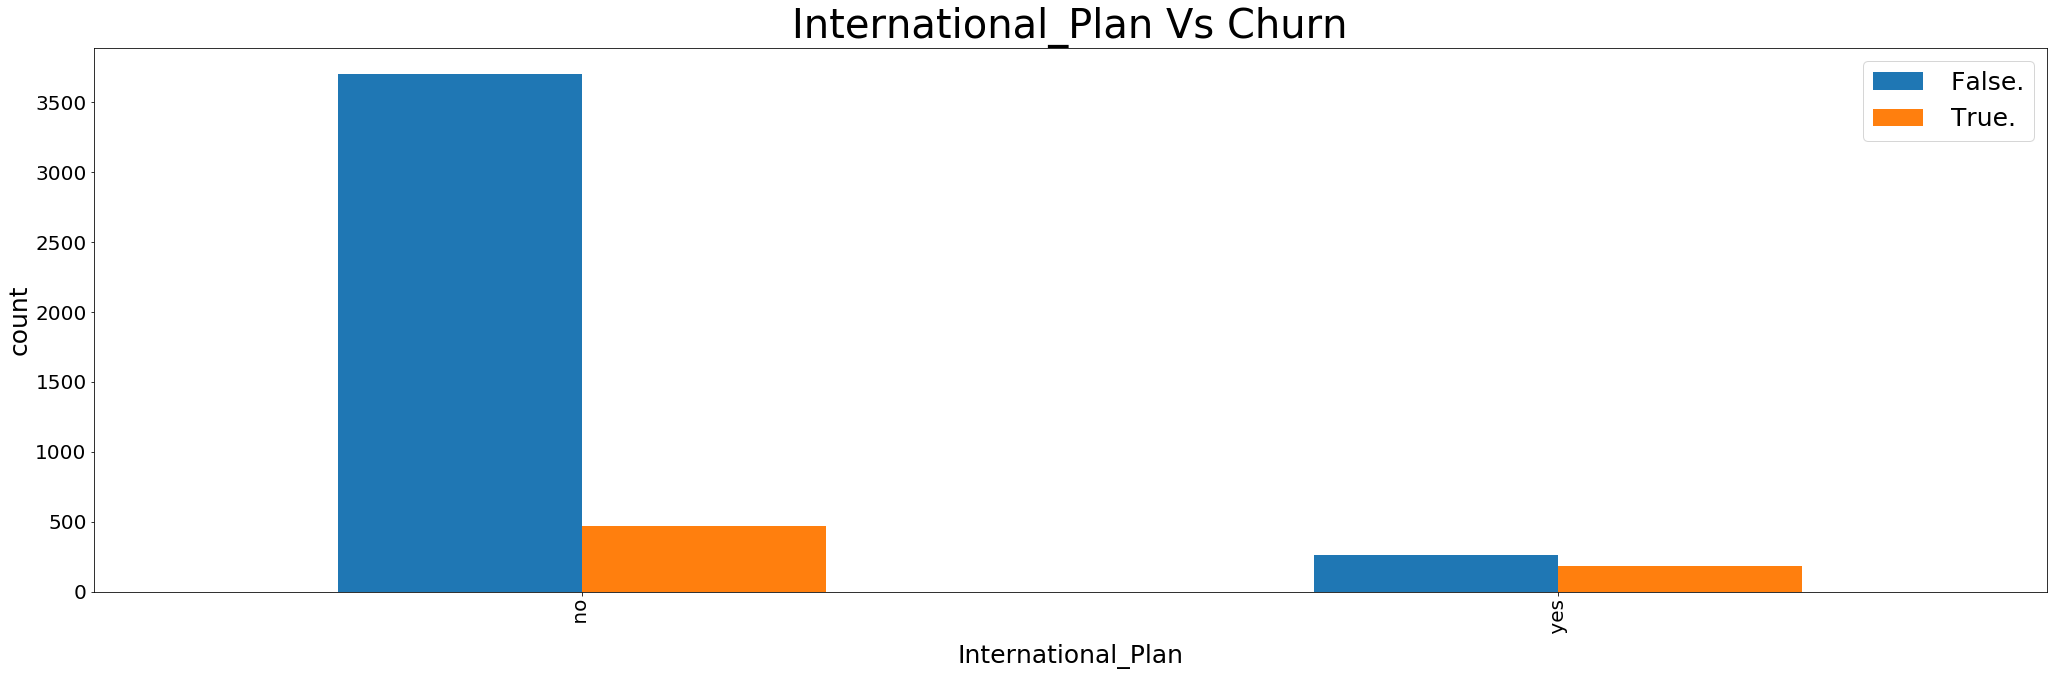

In [22]:
diff_bar('International_Plan','Churn')

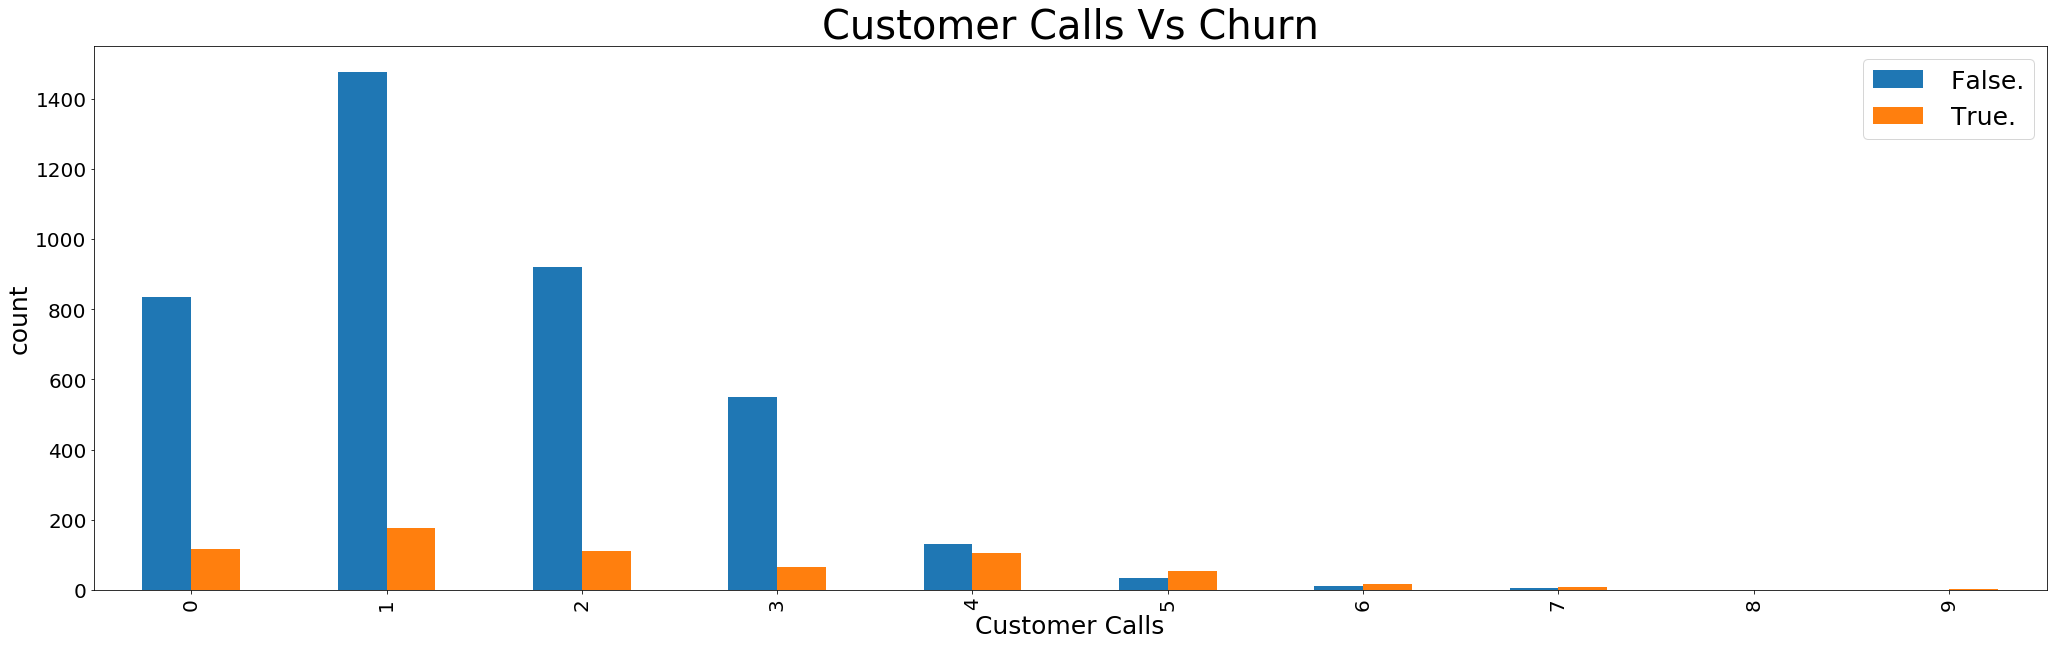

In [23]:
diff_bar('Customer Calls','Churn')


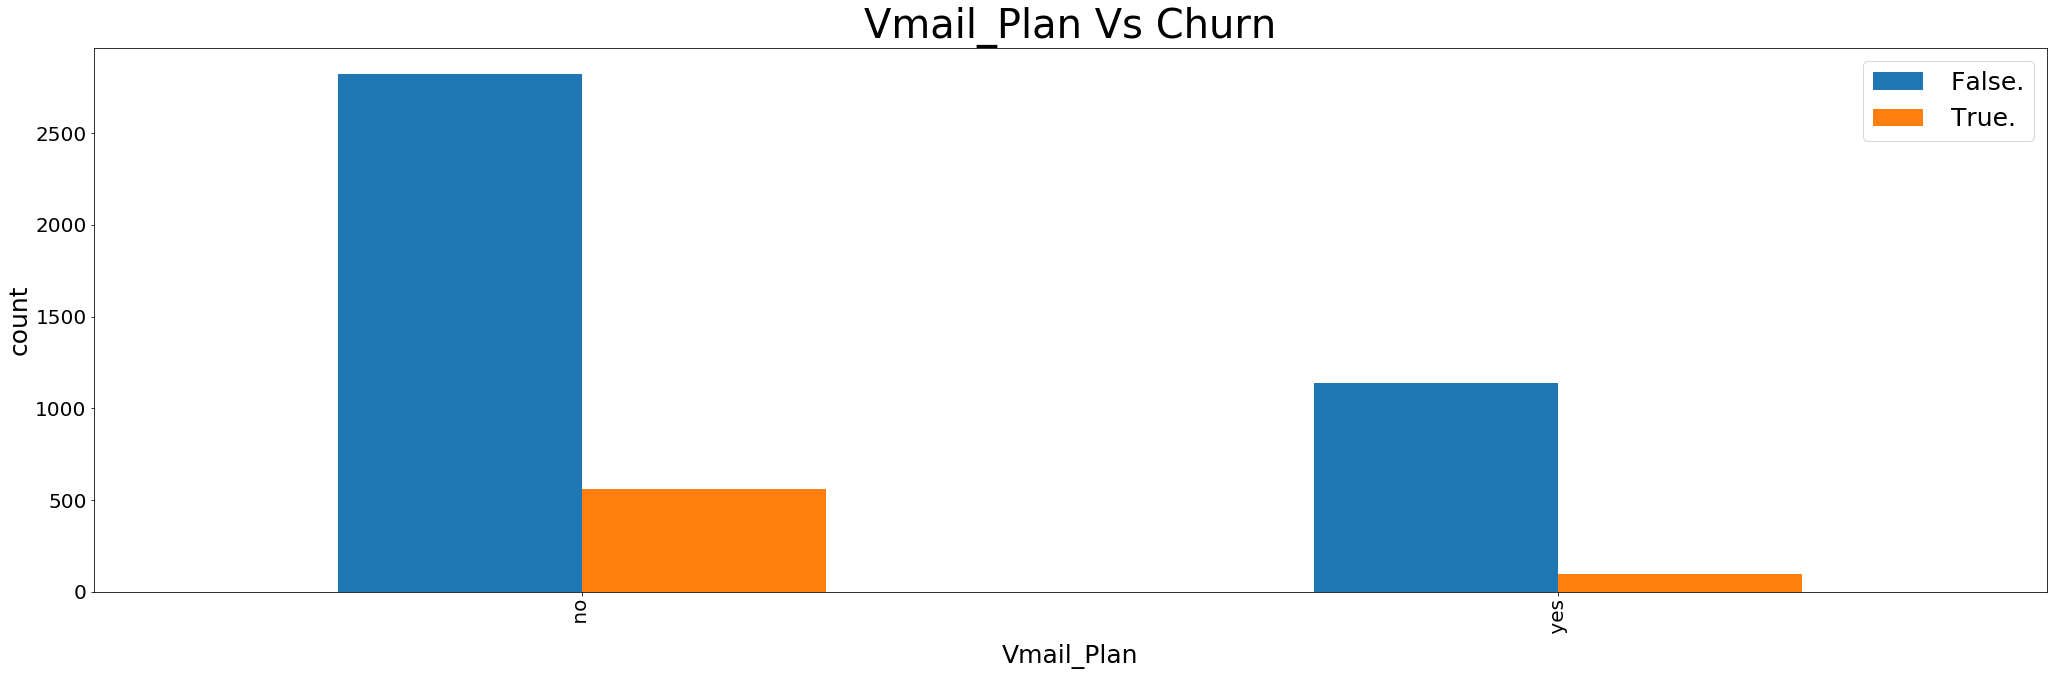

In [24]:
diff_bar('Vmail_Plan','Churn')

In [25]:
def diff_scattr(x,y):
    fig = plt.figure()
    fig = sns.lmplot(x,y, data=data,fit_reg=False)
    plt.xlabel(x,fontsize= 14)
    plt.ylabel(y,fontsize= 14)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title("{X} and {Y} Scatter Plot".format(X=x,Y=y),fontsize = 16)
    #fig.savefig("{X}_and_{Y}_Scatter_Plot..png".format(X=x,Y=y))
    plt.show()

<Figure size 432x288 with 0 Axes>

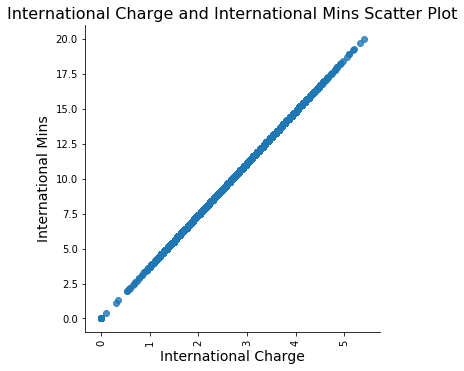

In [26]:
diff_scattr('International Charge','International Mins')

<Figure size 432x288 with 0 Axes>

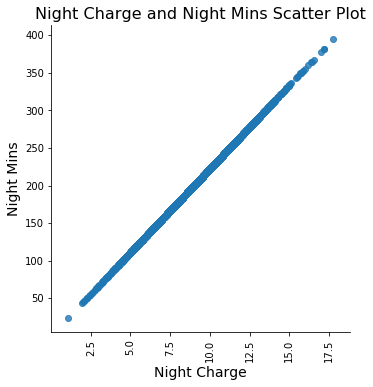

In [27]:
diff_scattr('Night Charge','Night Mins')


<Figure size 432x288 with 0 Axes>

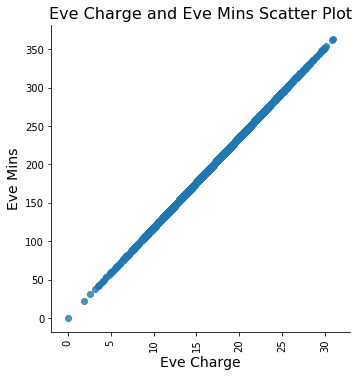

In [28]:
diff_scattr('Eve Charge','Eve Mins')

<Figure size 432x288 with 0 Axes>

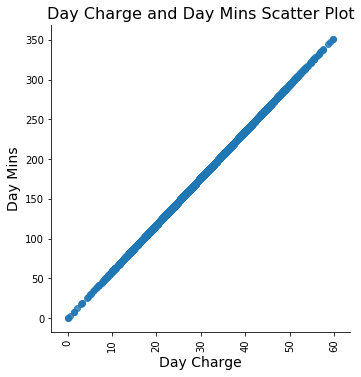

In [29]:
diff_scattr('Day Charge','Day Mins')


 # Changing Categorical colum values to numeric codes

In [30]:
def cat_to_num(df):
    for i in range(0, df.shape[1]):
        #print(i)
        if(df.iloc[:,i].dtypes == 'object'):
            df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
            df.iloc[:,i] = df.iloc[:,i].cat.codes
            df.iloc[:,i] = df.iloc[:,i].astype('object')
    return df

In [31]:
data = cat_to_num(data)


# Anomaly Detections or Outlier Analysis

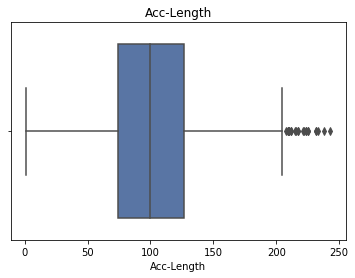

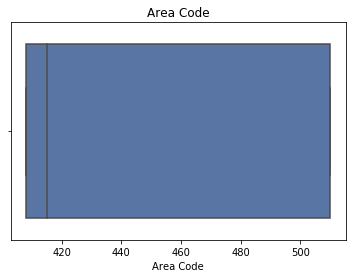

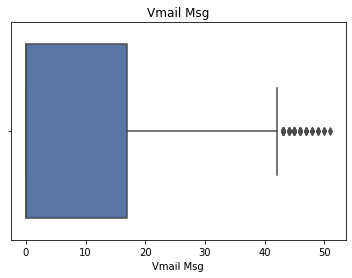

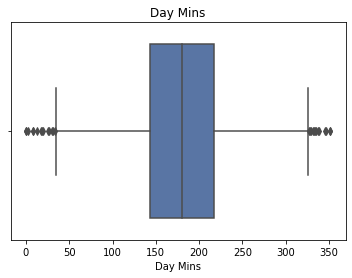

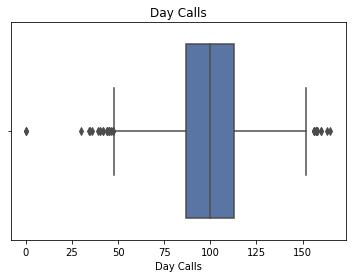

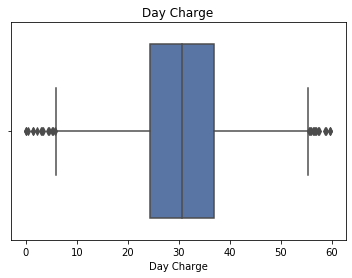

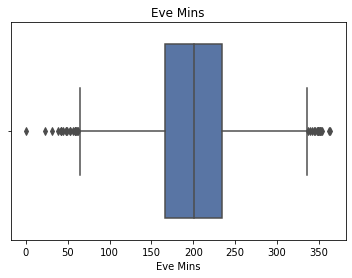

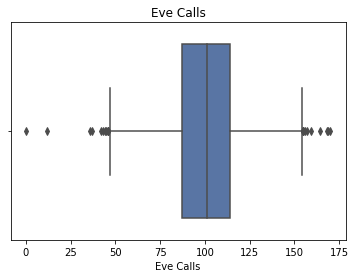

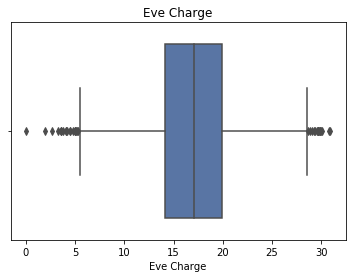

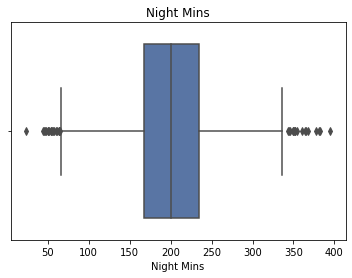

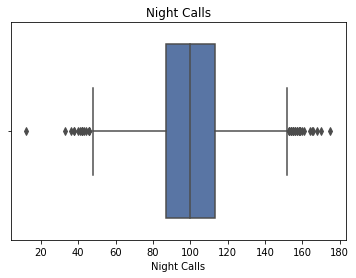

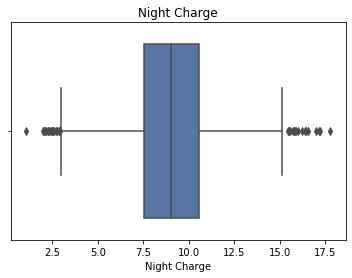

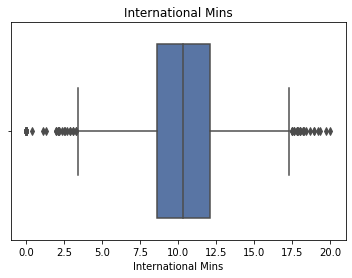

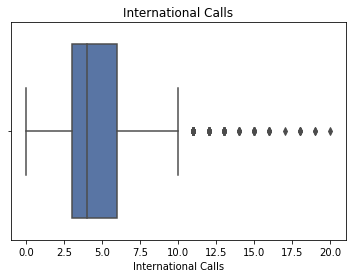

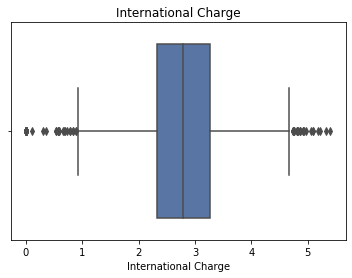

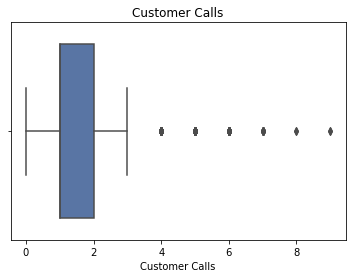

In [32]:
for i in cname:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(data[i],palette="deep")
    plt.title(i)
    plt.show()

In [33]:
for i in cname:
    #print(i)
    q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
#Converting to nan
    data.loc[data.loc[:,i] < minn,i] = np.nan
    data.loc[data.loc[:,i] > maxx,i] = np.nan
    print('{var} -----> {X}   Missing'.format(var = i, X = (data.loc[:,i].isnull().sum())))

Acc-Length -----> 23   Missing
Area Code -----> 0   Missing
Vmail Msg -----> 51   Missing
Day Mins -----> 27   Missing
Day Calls -----> 34   Missing
Day Charge -----> 27   Missing
Eve Mins -----> 36   Missing
Eve Calls -----> 25   Missing
Eve Charge -----> 36   Missing
Night Mins -----> 36   Missing
Night Calls -----> 42   Missing
Night Charge -----> 36   Missing
International Mins -----> 65   Missing
International Calls -----> 107   Missing
International Charge -----> 65   Missing
Customer Calls -----> 368   Missing


In [34]:
# Imputing with mean because fancyimpute not working
for i in cname:
    print (i)
    data = data.apply(lambda x:x.fillna(data.loc[:,i].mean()))

Acc-Length
Area Code
Vmail Msg
Day Mins
Day Calls
Day Charge
Eve Mins
Eve Calls
Eve Charge
Night Mins
Night Calls
Night Charge
International Mins
International Calls
International Charge
Customer Calls


In [35]:
data.head(1)


,State,Acc-Length,Area Code,International_Plan,Vmail_Plan,Vmail Msg,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,Customer Calls,Churn
0,16,128.0,415.0,0,1,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.7,1.0,0


# Feature Selections

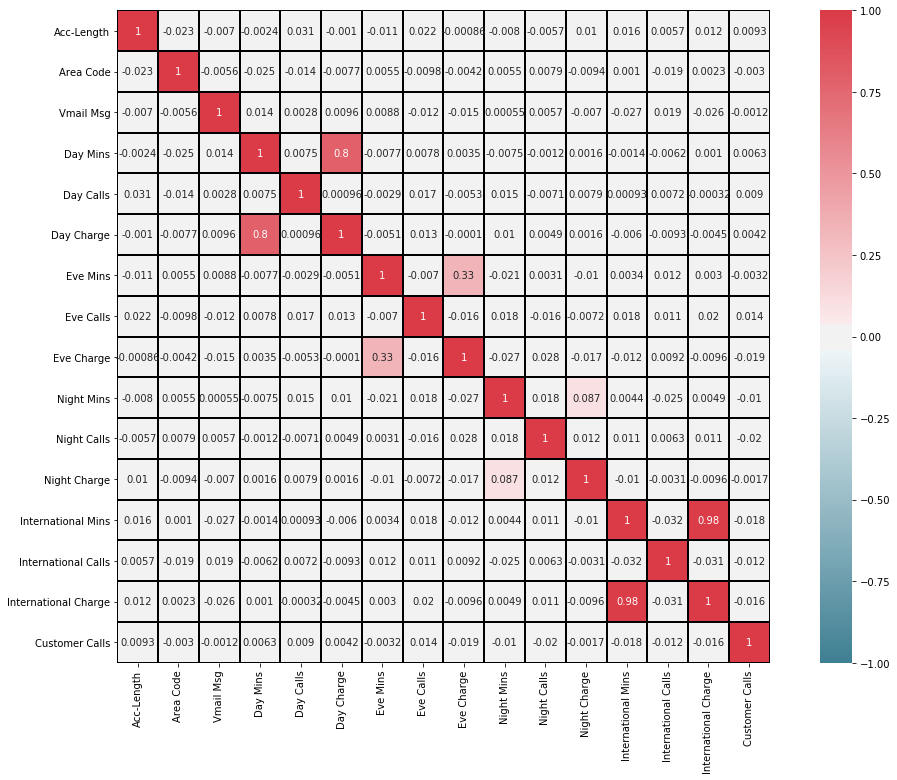

In [36]:
#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(18,12))  #Width,height

#Generating Corelation Matrix
corr = data[cname].corr()

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()
#f.savefig('heatmap.png')

# Chi-Square for Categorical variables

In [37]:
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    #As we know imput to chi square is always a contiguency table so we generating it using crostab function present in pd
    chi2, p, dof, ex =chi2_contingency(pd.crosstab(data['Churn'],data[i]))
    #as above pd.crosstab(dependent variable , independent variable)
    print(p)
    
#chi2 = Actual chi square test value
#p = pvalue
#dof = degree of freedom
#ex = expected value


State
0.0003716382614441693
International_Plan
5.1469217589105615e-68
Vmail_Plan
1.0310215433169948e-13


In [38]:
#Removing correlated variable & the variable which doesn't contain any meaning full info
rmev = ['State','Day Charge','Eve Charge','Night Charge','International Charge']
data = data.drop(rmev,axis=1)


In [39]:
cname = ['Acc-Length', 'Vmail Msg', 'Day Mins', 'Day Calls', 'Eve Mins','Eve Calls', 'Night Mins', 'Night Calls', 'International Mins', 
         'International Calls','Customer Calls']

#All categorical var and removing target var
cat_names = ['Area Code', 'International_Plan', 'Vmail_Plan']

print('cname :- {}'.format(cname))
print()
print('cat_name :- {}'.format(cat_names))

cname :- ['Acc-Length', 'Vmail Msg', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls', 'Night Mins', 'Night Calls', 'International Mins', 'International Calls', 'Customer Calls']

cat_name :- ['Area Code', 'International_Plan', 'Vmail_Plan']


# Feature Scaling

* Checking Distribution of data

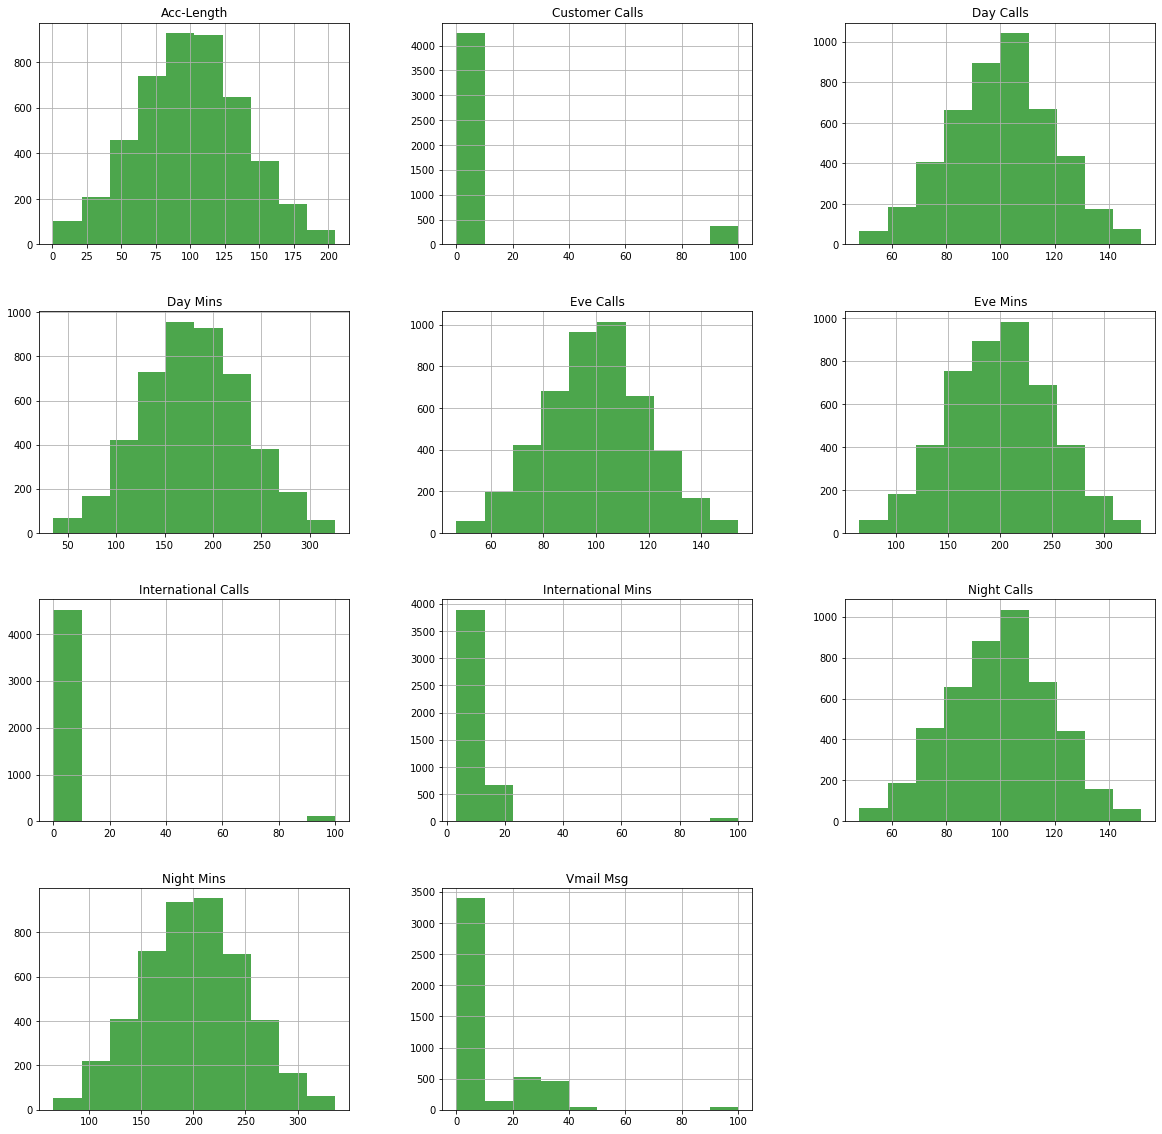

In [40]:
#Checking distribution of data via pandas visualization
data[cname].hist(figsize=(20,20),color='g',alpha = 0.7)
#plt.savefig('distribution.png')
plt.show()


In [42]:
def plot_hist_y(x,y):
    plt.hist(list(x[y == 1]),color='green',label='True',bins='auto')
    plt.hist(list(x[y == 0]),color='grey', alpha = 0.7, label='False',bins='auto')
    plt.title("Histogram of {var} breakdown by {Y}".format(var = x.name,Y=y.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.savefig("Histogram of {var} breakdown by {Y}.png".format(var = x.name,Y=y.name))
    plt.show()


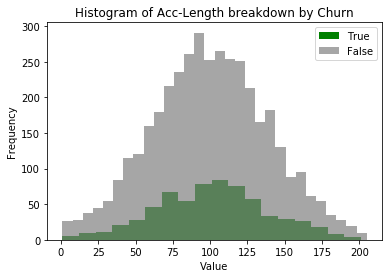

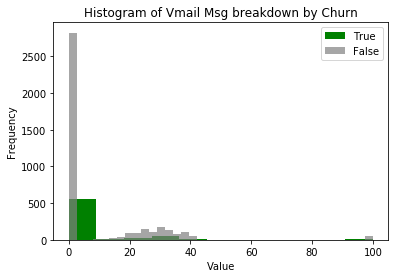

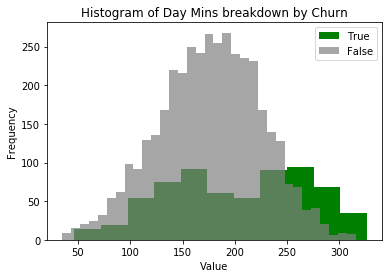

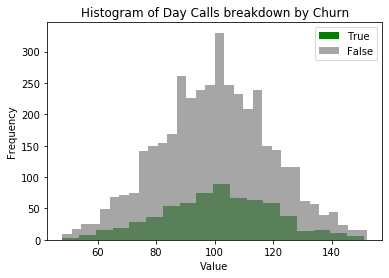

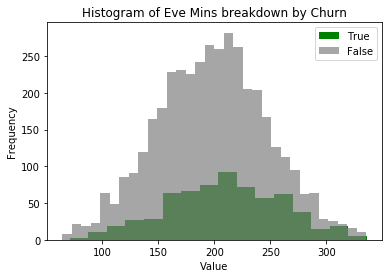

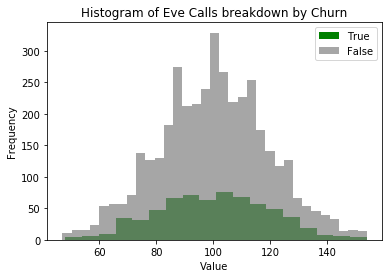

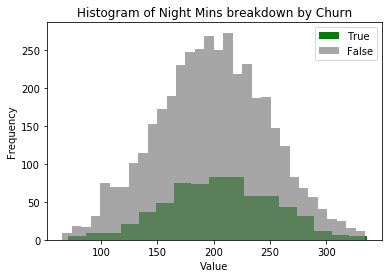

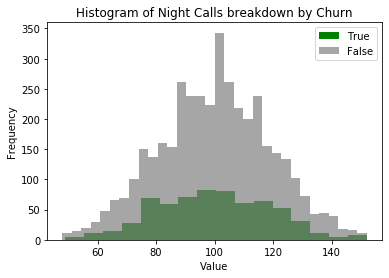

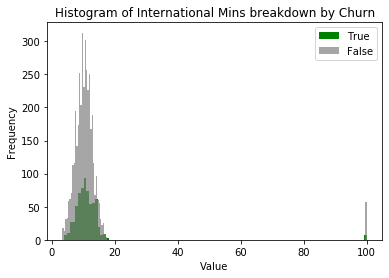

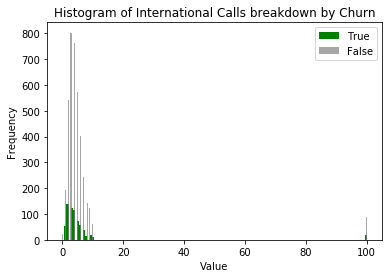

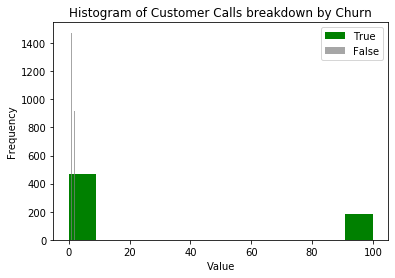

In [43]:
for i in cname:
    #print(i)
    plot_hist_y(data[i],data.Churn)


# Sampling Data For Train and Test

* Stratified Sampling

In [44]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
#Using train test split functionality for creatuing sampling
X = data.iloc[:,:14]
y = data.iloc[:,14]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


In [45]:
(X_train.shape),(y_train.shape)

((3093, 14), (3093,))

# Using SMOTE ( SMOTE: Synthetic Minority Over-sampling Technique)

In [47]:
!pip install imblearn


In [48]:
from imblearn.over_sampling import SMOTE

Smo = SMOTE(random_state=101)
X_train_res, y_train_res = Smo.fit_sample(X_train,y_train)

In [49]:
(X_train_res.shape,y_train_res.shape)

((5294, 14), (5294,))

# Prediction function

In [50]:
def pred(model_object,predictors,compare):
    """1.model_object = model name
       2.predictors = data to be predicted
       3.compare = y_train"""
    predicted = model_object.predict(predictors)
    # Determine the false positive and true positive rates
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print() 
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))


# Model Level Approach
* Just to check which models fits good without optimization
# RandomForest

In [65]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100,random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(rf_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0    1
Churn           
0      1273   41
1        66  144

Classification paradox :------->>
Accuracy :-  92.98

Specificity //  True Negative Rate :-  96.88

Sensivity // True Positive Rate // Recall :-  68.57

False Negative Rate :-  31.43

False Postive Rate :-  3.12

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1314
           1       0.78      0.69      0.73       210

    accuracy                           0.93      1524
   macro avg       0.86      0.83      0.84      1524
weighted avg       0.93      0.93      0.93      1524



# Logistic Regression

In [64]:
#logistic without binaries
logit_model = LogisticRegression(random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(logit_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0    1
Churn           
0      1036  278
1        35  175

Classification paradox :------->>
Accuracy :-  79.46

Specificity //  True Negative Rate :-  78.84

Sensivity // True Positive Rate // Recall :-  83.33

False Negative Rate :-  16.67

False Postive Rate :-  21.16

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1314
           1       0.39      0.83      0.53       210

    accuracy                           0.79      1524
   macro avg       0.68      0.81      0.70      1524
weighted avg       0.89      0.79      0.82      1524



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Model Development
KNN_Model = KNeighborsClassifier(n_neighbors=5).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(KNN_Model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      995  319
1       66  144

Classification paradox :------->>
Accuracy :-  74.74

Specificity //  True Negative Rate :-  75.72

Sensivity // True Positive Rate // Recall :-  68.57

False Negative Rate :-  31.43

False Postive Rate :-  24.28

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1314
           1       0.31      0.69      0.43       210

    accuracy                           0.75      1524
   macro avg       0.62      0.72      0.63      1524
weighted avg       0.85      0.75      0.78      1524



# Navie Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
#Navie Model Development
Naive_model = GaussianNB().fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(Naive_model,X_test,y_test)


CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      752  562
1       39  171

Classification paradox :------->>
Accuracy :-  60.56

Specificity //  True Negative Rate :-  57.23

Sensivity // True Positive Rate // Recall :-  81.43

False Negative Rate :-  18.57

False Postive Rate :-  42.77

              precision    recall  f1-score   support

           0       0.95      0.57      0.71      1314
           1       0.23      0.81      0.36       210

    accuracy                           0.61      1524
   macro avg       0.59      0.69      0.54      1524
weighted avg       0.85      0.61      0.67      1524



# Final Model :- Random Forest
* As above random forest fits best for out dataset out of our tested models
* Features Importance

In [55]:
# Training Final Model With Optimum Parameters
final_Model = RandomForestClassifier(random_state=101, n_estimators = 500,n_jobs=-1)
final_Model.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

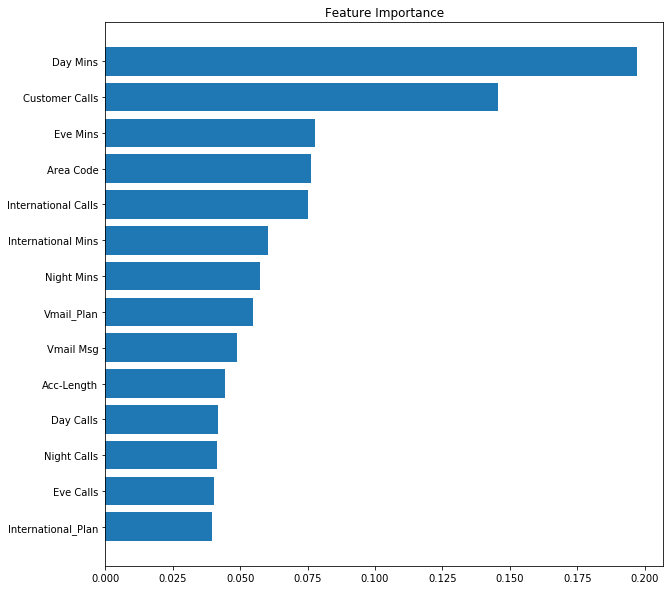

In [57]:
importances = final_Model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [data.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(X.shape[1]),importances[indices],align = 'center')
plt.yticks(range(X.shape[1]), names)
plt.show()
#fig.savefig('feature_importance.png')

# AUC & ROC Curve

ROC AUC: 0.89


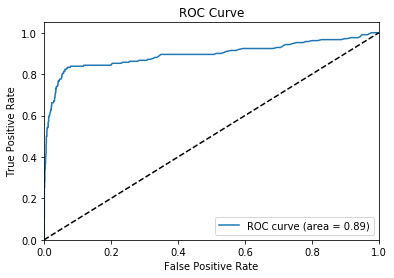

In [58]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, final_Model.predict_proba(X_test)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Final Test Data Predictions


In [60]:
# #Test Data Spliting parts target and Predictors
XX = data.iloc[:,:14].values  #predictors
yy = data.iloc[:,14].values   #target
yy=yy.astype('int')


In [61]:
#Predicting test data 
#pred(model_object=final_Model,predictors=XX,compare=yy)

Churn_Pred = final_Model.predict(XX)
cm = pd.crosstab(yy,Churn_Pred)
TN = cm.iloc[0,0]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]
FP = cm.iloc[0,1]
print("CONFUSION MATRIX ----->> ")
print(cm)
print()
##check accuracy of model
print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))

CONFUSION MATRIX ----->> 
col_0     0    1
row_0           
0      3918   43
1        65  591

Accuracy :-  97.66
False Negative Rate :-  9.91
False Postive Rate :-  1.09


In [62]:
print(classification_report(yy,Churn_Pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3961
           1       0.93      0.90      0.92       656

    accuracy                           0.98      4617
   macro avg       0.96      0.95      0.95      4617
weighted avg       0.98      0.98      0.98      4617



# AUC & ROC over Test Data

ROC AUC: 0.98


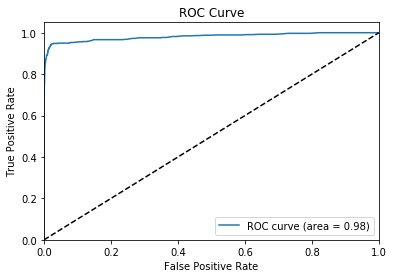

In [63]:
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(yy, final_Model.predict_proba(XX)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

* Random forest has the best results for our problem. Random Forest has the best accuracy and lowest false negative rate and     also lowest false positive rate.Hence we’ll choose Random Forest.